# Exercise 1: Simple Tokenization to Extract Words

## 1.1 What is Tokenization?

When we split text into smaller units, we are performing the process of *tokenization*. For now, we will consider these units as words in the text.
![tokenization-figure](../figures/class1/we-love-nlp-tokenization.png)


```{admonition} LLM FRAMING
:class: fuchsia
This is also the first step in how *Large Language Models* represent text, although, as you will see later, they do not necessarily use *words* as their basic units.  
```


## 1.2 String-splitting to get a word list
Below is an essay by ChatGPT-4 about "distance-learning vs. attending school in person"  (`essay48.txt` in {cite:t}`herbold_large-scale_2023`). You don't need to read it all, but have a quick skim :)

In [283]:
chatgpt_text = """
Title: Distance Learning vs. Attending School In Person: A Comparative Analysis
Education, a cornerstone of human development, has evolved significantly over time. 
With the advent of technology and the challenges posed by the global pandemic, the focus has shifted towards distance learning, a mode that offers flexibility, accessibility, and convenience. 
However, traditional in-person learning remains indispensable for a holistic educational experience. 
This essay will compare and contrast distance learning and attending school in person, highlighting the advantages and disadvantages of each.

Distance learning, primarily facilitated through online platforms, offers a plethora of advantages. 
It provides students with access to a vast array of resources and the ability to learn at their own pace. 
Moreover, it transcends geographical boundaries, allowing students from remote locations to access quality education. 
Nevertheless, distance learning poses challenges related to student engagement, lack of social interaction, and the potential for digital inequity.

On the other hand, attending school in person offers a well-rounded learning experience. In-person learning fosters strong bonds among students, promoting teamwork and collaboration. 
Furthermore, it enables teachers to provide immediate feedback and tailor their teaching methods to the individual needs of students. 
However, traditional classrooms may limit access to resources and impose geographical constraints.

In conclusion, both distance learning and in-person education have their unique advantages and disadvantages. 
Distance learning offers flexibility and accessibility, while in-person learning facilitates social interaction and individualized instruction. 
As education continues to evolve, a hybrid approach that combines the strengths of both methods may prove to be the most effective solution, catering to the diverse needs of students in the 21st century.
"""

To explore its word distribution, we will "cut up" the string of text into individual words using the `.split` method ...

### Pre-processing
... before we split, we need to do some simple pre-processing. As a start, we will *lowercase* the text and *remove basic punctuation*.

```{admonition} QUESTION
:class: red

Why would it be important to lowercase and remove punctuation? Consider this with your group and click to reveal answer before proceeding.


<details>
<summary>Click to see ANSWER</summary>
So the same word is grouped in the distribution. In <code>essay48.txt</code>, for example, <code>"advantages"</code> and <code>"advantages."</code> or <code>"Distance"</code> and <code>"distance"</code> would otherwise be counted separately.
</details>
```

Lowercasing the text:

In [284]:
chatgpt_lowercased = chatgpt_text.lower()
print(chatgpt_lowercased[:300]) # brackets imply printing the first 300 characters (just to get a shorter output).


title: distance learning vs. attending school in person: a comparative analysis
education, a cornerstone of human development, has evolved significantly over time. 
with the advent of technology and the challenges posed by the global pandemic, the focus has shifted towards distance learning, a mode


Removing punctuation:

In [285]:
# built-in library for working with regular expressions (rule-based pattern matching)
# best practice is to import at the top of a notebook, but included here for simplicity
import re 

# remove all ".", ",", "!", "?" ":"" from the text with regex
chatgpt_clean = re.sub(r"[.,!?:]", "", chatgpt_lowercased) 
print(chatgpt_clean[:279])


title distance learning vs attending school in person a comparative analysis
education a cornerstone of human development has evolved significantly over time 
with the advent of technology and the challenges posed by the global pandemic the focus has shifted towards distance le


### Ready to split!
We will use the `.split()` method on our pre-processed `chatgpt_clean`:

In [286]:
chatgpt_words = chatgpt_clean.split()

Let's look at the first 50 words of our printed text. (*you can side-scroll through the words*)


In [287]:
print(chatgpt_words[:50])

['title', 'distance', 'learning', 'vs', 'attending', 'school', 'in', 'person', 'a', 'comparative', 'analysis', 'education', 'a', 'cornerstone', 'of', 'human', 'development', 'has', 'evolved', 'significantly', 'over', 'time', 'with', 'the', 'advent', 'of', 'technology', 'and', 'the', 'challenges', 'posed', 'by', 'the', 'global', 'pandemic', 'the', 'focus', 'has', 'shifted', 'towards', 'distance', 'learning', 'a', 'mode', 'that', 'offers', 'flexibility', 'accessibility', 'and', 'convenience']


### Your Turn :)

```{admonition} HANDS-ON
:class: red

Below you'll find the `student_text` which needs to go through a similar processing and splitting of words. 

**YOUR TASK**: Define a function that can take a string like `student_text` or `chatgpt_text` and do all the steps above before returning a list variable `words`. 

**WHY?** It is good practice to write your code into seperate ("modular") functions if you know that you need to run the code more than once!
```

In [288]:
student_text = """
A matter of considerable controversy at present is the issue of whether distance-learning should be promoted as much as possible, or rather attending lectures in person should be allowed to take a predominant place in universities because this way of learning is superior than online degrees. From my perspective, online-teaching should be widely used among colleges and universities in terms of convenience and optimizing cost for educational institutions.
To begin with, distance-learning brings significant convenience for students in every corner of the world. In earlier times, students who were tired of commuting had to attend schools nearby, regardless of any differences in teaching facilities, teacher's qualifications or the school reputation. Now, however, students are able to apply for online-courses provided by top-of-the-range universities and colleges worldwide. 
Furthermore, the presence of video conferencing allows a teacher to teach a greater number of students. Consequently, educational institutions are able to optimize costs by increasing teacher-student ratios. Thanks to the economical online-teaching, universities and colleges are able to offer grants for students who have outstanding academic achievements but are unable to attend schools because of financial constrains.
Nevertheless, opponents of online-degrees would argue that attending lectures in person provides students an opportunity to communicate with teachers and other classmates. They further point out that traditional teaching approaches involving discussion and cooperation among students play a significant role in campus life. It is the real interactions and communications in class make education much more attractive.
By way of conclusion, it is my belief that distance-learning will become increasingly important in the future as the pace of life increases. However, discussions and interactions should be held via video conferencing frequently so that the joy of learning would not be diminished.
"""

If you need a primer on `functions` in Python, they are defined as such:


In [289]:
def add_two_to_my_number(my_number): # the input variable or "parameters" of the function written
    """
    This function adds '2' to 'my_number'
    """
    new_number = 2 + my_number

    return new_number

new_number = add_two_to_my_number(my_number = 4)
print(new_number)

6


Now take this skeleton of a function and make your procesing pipeline!

In [290]:
#### write your function in your own notebook:
def get_words(text):
    """
    This function takes 'text' as input and makes it lowercase, removes basic punctuation, and splits the text into a list of words.
    """
    # remove pass and insert your steps!
    pass 

In [291]:
#### apply it to student text!!

If you are stuck or want to compare your code to mine, here is my solution:

In [292]:
def get_words(text:str) -> list[str]: # note: ':str' in params and 'list[str]' are called "type hints" and documents what types of variables should be input and output
    """
    This function takes 'text' as input and makes it lowercase, removes basic punctuation, and splits the text into a list of words.

    Args 
        text: string to be processed 
    
    Returns
        words: list of all words in 'text'
    """
    # pre-processing
    lowercased_text = text.lower()
    clean_text = re.sub(r"[.,!?:]", "", lowercased_text) 

    words = clean_text.split()

    return words

# applying it!
student_words = get_words(student_text)
print(student_words)

['a', 'matter', 'of', 'considerable', 'controversy', 'at', 'present', 'is', 'the', 'issue', 'of', 'whether', 'distance-learning', 'should', 'be', 'promoted', 'as', 'much', 'as', 'possible', 'or', 'rather', 'attending', 'lectures', 'in', 'person', 'should', 'be', 'allowed', 'to', 'take', 'a', 'predominant', 'place', 'in', 'universities', 'because', 'this', 'way', 'of', 'learning', 'is', 'superior', 'than', 'online', 'degrees', 'from', 'my', 'perspective', 'online-teaching', 'should', 'be', 'widely', 'used', 'among', 'colleges', 'and', 'universities', 'in', 'terms', 'of', 'convenience', 'and', 'optimizing', 'cost', 'for', 'educational', 'institutions', 'to', 'begin', 'with', 'distance-learning', 'brings', 'significant', 'convenience', 'for', 'students', 'in', 'every', 'corner', 'of', 'the', 'world', 'in', 'earlier', 'times', 'students', 'who', 'were', 'tired', 'of', 'commuting', 'had', 'to', 'attend', 'schools', 'nearby', 'regardless', 'of', 'any', 'differences', 'in', 'teaching', 'facil

## 1.3 Counting & Plotting Words
Now that you have a pipeline for cleaning text, let's count it and plot it!

In [293]:
from collections import Counter # another built-in library!

student_counts = Counter(student_words)
chatgpt_counts = Counter(chatgpt_words)

We will use the libraries `pandas` for data wrangling and `matplotlib` + `seaborn `for plotting. Install them in your chunk:

In [294]:
# in a notebook, %pip is a magic command that lets you install packages as you would in the terminal
%pip install pandas matplotlib seaborn --quiet 


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Prepare your data:

In [295]:
import pandas as pd
student_data = pd.DataFrame.from_dict(data=student_counts, 
                              orient='index').sort_values(by=0, 
                                                          ascending=False).reset_index()
chatgpt_data = pd.DataFrame.from_dict(data=chatgpt_counts, 
                              orient='index').sort_values(by=0, 
                                                          ascending=False).reset_index()

Plot:

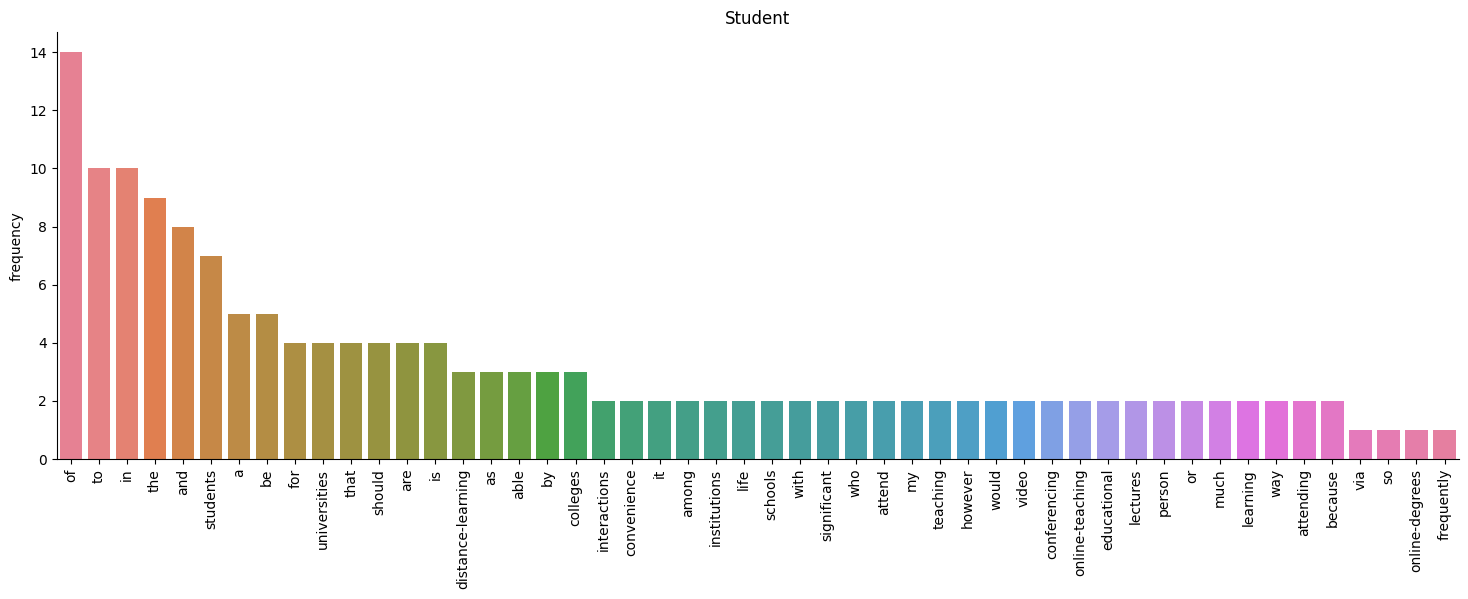

In [296]:
import seaborn as sns
from matplotlib import pyplot as plt

# determine how many words we are plotting
n_most_frequent = 50

# plot for student
sns.catplot(
            data=student_data.head(n=n_most_frequent), 
            x='index', 
            y=0, 
            kind='bar',
            height=5, 
            aspect=3,
            palette="husl",   # rainbow colors
            hue="index"       # force each category to be colored separately
            )      
plt.xticks(rotation=90)
plt.title("Student")
plt.xlabel('')
plt.ylabel('frequency')
plt.show()

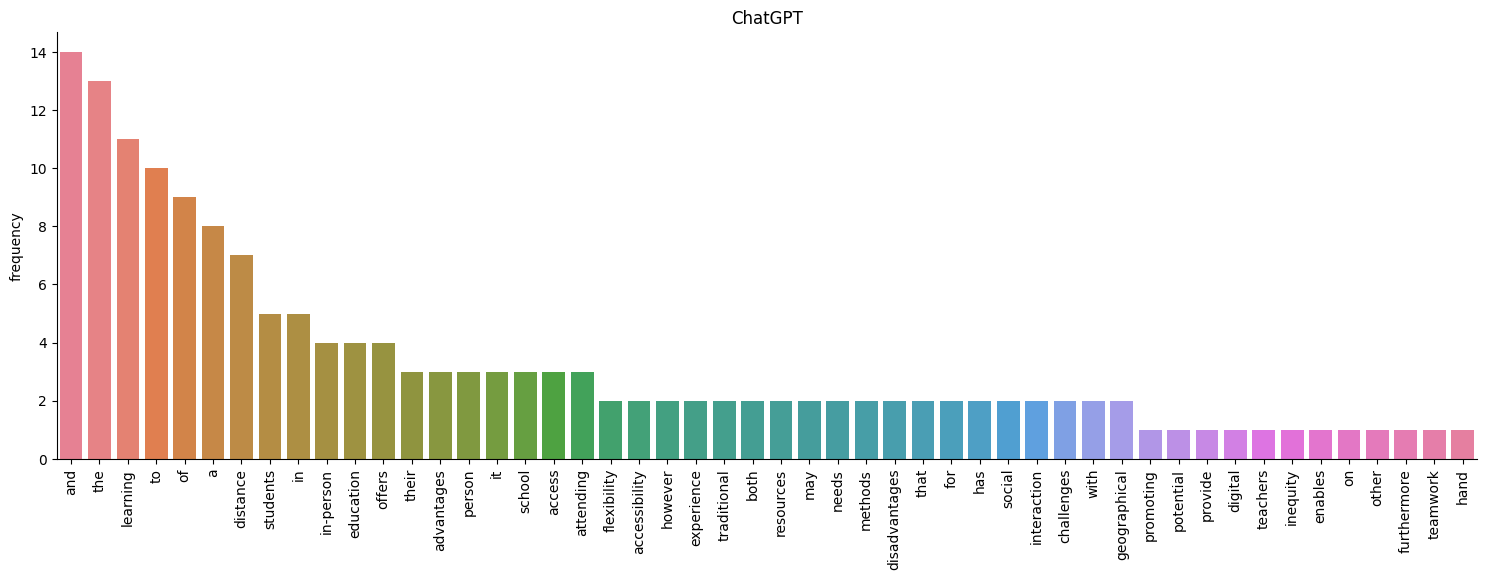

In [297]:
# plot for student
sns.catplot(
            data=chatgpt_data.head(n=n_most_frequent), 
            x='index', 
            y=0, 
            kind='bar',
            height=5, 
            aspect=3,
            palette="husl",   # rainbow colors
            hue="index"       # force each category to be colored separately
            )      
plt.title("ChatGPT")
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('frequency')
plt.show()

```{admonition} QUESTION
:class: red

Consider the two plots above. Do you notice any differences? Do you have any ideas for how to treat this data / word list that may make it more meaningful?
```